In [1]:
# importing libraries
import pandas as pd
import os
import numpy as np


In [3]:
# merging data
files = [file for file in os.listdir('./Sales_Data')]
concat_df = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    concat_df = pd.concat((df, concat_df), ignore_index = True )
    
concat_df
df = concat_df


### cleaning the data 

In [47]:
# seems there are null values
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          900
Purchase Address    545
dtype: int64

In [ ]:
df.dtypes

In [5]:
# conversion of datatype
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

In [6]:
null_values = df['Order Date'].isna()

In [7]:
df.drop(df[null_values].index)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,194090,Google Phone,1,600,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001"
186846,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301"
186847,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016"
186848,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035"


In [8]:
error_rows = df[df['Order Date'].isna()]
months_purchase = df.drop(error_rows.index).copy()

In [9]:
# the cleaned data
months_purchase

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,194090,Google Phone,1,600,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001"
186846,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301"
186847,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016"
186848,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035"


### formatting the data

In [10]:
# add the month column
months_purchase['Month'] = months_purchase['Order Date'].dt.month

### analysing the adress column ,seems that it contains street,city, state, zip code ; we will try to extract the city and the state

In [20]:
months_purchase['city'] = months_purchase['Purchase Address'].apply(lambda x: x.split(',')[1] )

In [21]:
months_purchase['state'] = months_purchase['Purchase Address'].apply(lambda x: x.split(',')[-1].split(' ')[1] )

In [12]:
months_purchase.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
dtype: object

In [11]:
months_purchase.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month'],
      dtype='object')

#### knowing that we will be performing some measures of central tendency on such columns such as Quantity Ordered, Price Each ..., we need to modify their types

In [13]:
months_purchase['Quantity Ordered'] = months_purchase['Quantity Ordered'].astype(int)

In [14]:
months_purchase['Price Each'] = months_purchase['Price Each'].astype(float)

In [15]:
months_purchase['revenue'] = np.multiply(months_purchase['Price Each'], months_purchase['Quantity Ordered'])

In [16]:
months_purchase

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,revenue
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95
...,...,...,...,...,...,...,...,...
186845,194090,Google Phone,1,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",4,600.00
186846,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",4,3.84
186847,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",4,5.98
186848,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",4,3.84



# Data Exploration

#### Question 1: What was the best month for sales? How much was earned that month? 

In [17]:
month_grouping = months_purchase.groupby('Month')

In [61]:
months_revenues = month_grouping.agg({'revenue' : 'sum'})
months_revenues

,revenue
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


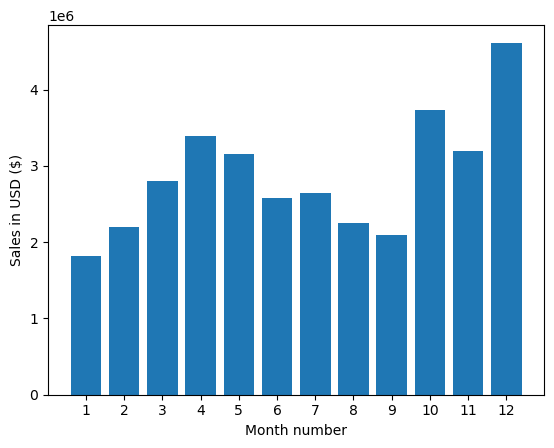

In [60]:
import matplotlib.pyplot as plt

months = range(1, 13)
plt.bar(months, months_revenues['revenue'].tolist())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


### seems that December has the highest revenues , I might assume that chrismas and eve  is contributing in this case 

###  what city has highest number of sells?

In [19]:
months_purchase.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,revenue
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95


In [62]:
# grouping by city and state
city_grouping = months_purchase.groupby(['city', 'state'])

In [63]:
city_grouping.agg({'revenue': 'sum'}).sort_values('revenue', ascending = False)

,,revenue
city,state,
San Francisco,CA,8262203.91
Los Angeles,CA,5452570.80
New York City,NY,4664317.43
Boston,MA,3661642.01
Atlanta,GA,2795498.58
Dallas,TX,2767975.40
Seattle,WA,2747755.48
Portland,OR,1870732.34
Austin,TX,1819581.75


In [25]:
months_purchase.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,revenue,city,state
186845,194090,Google Phone,1,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
186846,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",4,3.84,Austin,TX
186847,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",4,5.98,San Francisco,CA
186848,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",4,3.84,Portland,OR
186849,194094,Lightning Charging Cable,1,14.95,2019-04-18 11:08:00,"354 North St, Boston, MA 02215",4,14.95,Boston,MA


#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [64]:
time = months_purchase['Order Date'].dt.time

In [65]:
adv_hour = time.apply(lambda x : int(str(x).split(':')[0]))

In [66]:
months_purchase['adv_hour'] = adv_hour

In [67]:
months_purchase.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
revenue                    float64
city                        object
state                       object
adv_hour                     int64
dtype: object

In [68]:
hour_grouping = months_purchase.groupby('adv_hour')

In [69]:
hour_grouping['revenue'].agg(['sum', 'mean', 'count']).sort_values(by = ['count', 'sum'] , ascending = False)

,sum,mean,count
adv_hour,,,
19,2412938.54,186.977028,12905
12,2316821.34,184.064617,12587
11,2300610.24,185.368644,12411
18,2219348.30,180.728689,12280
20,2281716.24,186.597664,12228
13,2155389.80,177.705483,12129
14,2083672.73,189.700722,10984
10,1944286.77,177.657782,10944
21,2042000.86,186.979293,10921


#### the best adv hour can differe from a city to another regarding how large the us is

In [70]:
hour_city_grouping = months_purchase.groupby(['city', 'adv_hour'])

In [71]:
best_hours_per_state = hour_city_grouping['Order ID'].count()\
       .groupby(['city']).idxmax()

In [72]:
best_hours_per_state.apply(lambda x : x[1]).value_counts()

Order ID
19    6
13    1
11    1
12    1
Name: count, dtype: int64

#### seems like the best adv hour is arround 19:00

In [35]:
months_purchase.loc[months_purchase['Order ID'].duplicated(keep = False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,revenue,city,state,adv_hour
20,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,11.95,New York City,NY,15
21,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,11.95,New York City,NY,15
60,248210,iPhone,1,700.00,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,700.00,San Francisco,CA,10
61,248210,Lightning Charging Cable,1,14.95,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,14.95,San Francisco,CA,10
70,248219,Bose SoundSport Headphones,1,99.99,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,99.99,Los Angeles,CA,12
...,...,...,...,...,...,...,...,...,...,...,...
186803,194050,USB-C Charging Cable,1,11.95,2019-04-27 00:27:00,"997 9th St, San Francisco, CA 94016",4,11.95,San Francisco,CA,0
186809,194056,iPhone,1,700.00,2019-04-10 10:05:00,"280 7th St, San Francisco, CA 94016",4,700.00,San Francisco,CA,10
186810,194056,Lightning Charging Cable,1,14.95,2019-04-10 10:05:00,"280 7th St, San Francisco, CA 94016",4,14.95,San Francisco,CA,10
186815,194061,iPhone,1,700.00,2019-04-14 20:22:00,"209 6th St, Atlanta, GA 30301",4,700.00,Atlanta,GA,20


### What products are most often sold together?

In [74]:
order_grouped =months_purchase.groupby('Order ID')

In [75]:
def concatenate_strings(x):
    return x.str.cat(sep=',')
products = pd.DataFrame(order_grouped['Product'].agg(concatenate_strings))

In [76]:
combined_items = products[products['Product'].str.contains(',')]

In [77]:
combined_items.value_counts().head(10)

Product                                           
iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     77
Vareebadd Phone,Bose SoundSport Headphones             60
Name: count, dtype: int64

#### iPhone,Lightning Charging Cable  is the most often items sold together

In [41]:
 months_purchase

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,revenue,city,state,adv_hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,CA,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin,TX,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,CA,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,WA,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,GA,19
...,...,...,...,...,...,...,...,...,...,...,...
186845,194090,Google Phone,1,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,17
186846,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",4,3.84,Austin,TX,16
186847,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",4,5.98,San Francisco,CA,14
186848,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",4,3.84,Portland,OR,15


### What product sold the most? Why do you think it sold the most?

In [84]:
product_grouping = months_purchase.groupby('Product')

In [85]:
quantity_ordered = product_grouping.agg({"Quantity Ordered": 'sum'})


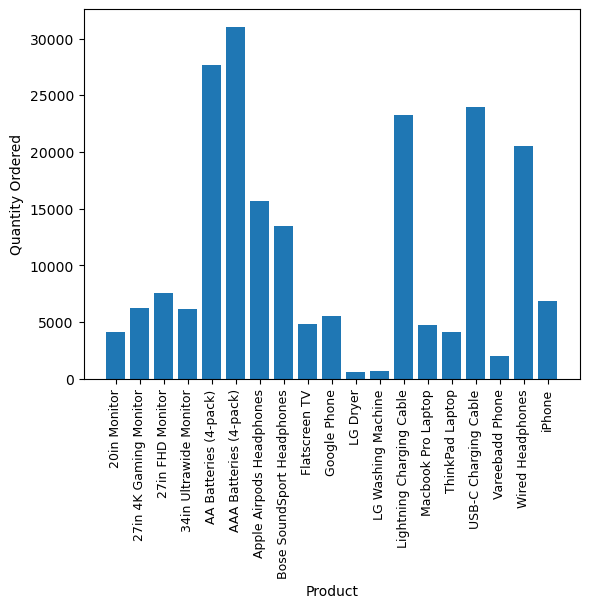

In [88]:
keys = list(quantity_ordered.index)  # Extracting the product names
values = quantity_ordered['Quantity Ordered']  # Extracting the quantity ordered values

import matplotlib.pyplot as plt

plt.bar(keys, values)
plt.xticks(keys, rotation='vertical', size=9)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()


#### seems like the AAA batteries are the most sold product

In [44]:
months_purchase.loc[months_purchase['Product'] == 'AAA Batteries (4-pack)']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,revenue,city,state,adv_hour
11,248162,AAA Batteries (4-pack),3,2.99,2019-09-14 12:52:00,"439 Walnut St, Seattle, WA 98101",9,8.97,Seattle,WA,12
19,248170,AAA Batteries (4-pack),1,2.99,2019-09-04 02:01:00,"857 Main St, Boston, MA 02215",9,2.99,Boston,MA,2
37,248187,AAA Batteries (4-pack),3,2.99,2019-09-07 23:31:00,"173 Elm St, Los Angeles, CA 90001",9,8.97,Los Angeles,CA,23
41,248191,AAA Batteries (4-pack),1,2.99,2019-09-22 11:25:00,"446 2nd St, San Francisco, CA 94016",9,2.99,San Francisco,CA,11
42,248192,AAA Batteries (4-pack),2,2.99,2019-09-21 09:16:00,"444 North St, Austin, TX 73301",9,5.98,Austin,TX,9
...,...,...,...,...,...,...,...,...,...,...,...
186812,194058,AAA Batteries (4-pack),2,2.99,2019-04-29 09:46:00,"684 Hill St, New York City, NY 10001",4,5.98,New York City,NY,9
186817,194062,AAA Batteries (4-pack),2,2.99,2019-04-19 19:52:00,"743 Highland St, Boston, MA 02215",4,5.98,Boston,MA,19
186836,194081,AAA Batteries (4-pack),1,2.99,2019-04-25 14:19:00,"110 Lake St, San Francisco, CA 94016",4,2.99,San Francisco,CA,14
186843,194088,AAA Batteries (4-pack),2,2.99,2019-04-04 18:46:00,"718 12th St, Austin, TX 73301",4,5.98,Austin,TX,18


##### I believe that the cheap price contributes to the high sales of the latter 